# Problem Context
   
A typical taxi company faces a common problem of efficiently assigning the cabs to passengers so that the service is smooth and hassle free. One of main issue is determining the duration of the current trip so it can predict when the cab will be free for the next trip.

The dataset contains New York City taxi trip records. The goal is to analyze the data to uncover insights and understand how various factors affect trip duration

# Data understanding
* id : a unique identifier for each trip
* vendor_id : a code indicating the provider associated with the trip record
* passenger_count : the number of passengers in the vehicle (driver entered value)
* pickup_datetime : the date and time when the meter was engaged
* pickup_longitude : the longitude when the meter was engaged
* pickup_latitude : the latitude when the meter was engaged
* dropoff_longitude : the longitude where the meter was disengaged
* dropoff_latitude : the latitude where the meter was disengaged
* store_and_fwd_flag : This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
* trip_duration : (target) duration of the trip in seconds

# Lets start!

In [2]:
#Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import warnings ## used to ignore warnings
warnings.filterwarnings('ignore')

In [3]:
#Load the data
df = pd.read_csv(r'/kaggle/input/train-data/train.csv')

In [4]:
df.shape

(1000000, 10)

In [5]:
# Displaying the columns' names with their datatypes and counting the number of null values
info = pd.DataFrame({
    'dtype': df.dtypes,
    'missing_values': df.isnull().sum()
})

info

,dtype,missing_values
id,object,0
vendor_id,int64,0
pickup_datetime,object,0
passenger_count,int64,0
pickup_longitude,float64,0
pickup_latitude,float64,0
dropoff_longitude,float64,0
dropoff_latitude,float64,0
store_and_fwd_flag,object,0
trip_duration,int64,0


In [6]:
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614
3,id1050851,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867
4,id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967


# Some observations about the data:

* The columns **id** and **vendor_id** are nominal.
* The column **pickup_datetime** is stored as object which must be converted to datetime for better analysis.
* The column **store_and_fwd_flag** is categorical

In [7]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06
mean,1.534793,1.665353,-73.973475,40.750947,-73.973421,40.751829,9.548850e+02
std,0.498788,1.315723,0.065404,0.033745,0.065432,0.035782,3.882070e+03
min,1.000000,0.000000,-121.933342,34.359695,-121.933304,34.359695,1.000000e+00
25%,1.000000,1.000000,-73.991852,40.737372,-73.991341,40.735928,3.970000e+02
50%,2.000000,1.000000,-73.981728,40.754131,-73.979767,40.754551,6.620000e+02
75%,2.000000,2.000000,-73.967346,40.768379,-73.963036,40.769833,1.074000e+03
max,2.000000,7.000000,-61.335529,51.881084,-61.335529,43.921028,2.227612e+06


# The returned table gives certain insights:

* **The minimum values at pickup_longitude & dropoff_longitude are definitely outliers.**
* **The passenger count varies between 0 and 7 with most people number of people being 1 or 2.**
* **The trip duration varying from 1s to 2227612s~618 hrs. There are definitely some outliers present which must be treated.**


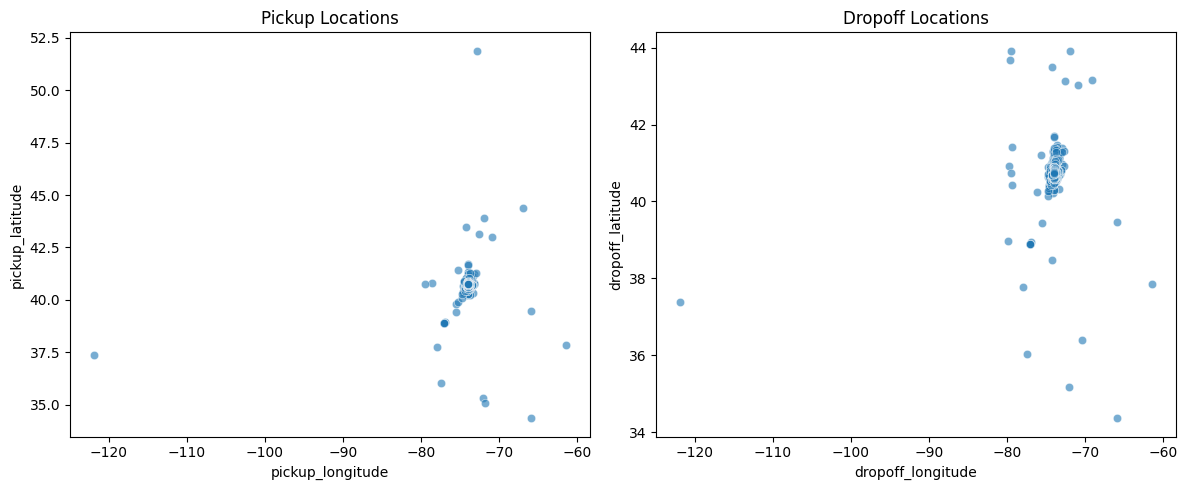

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# scatter plot 1
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=df, alpha=0.6, ax=ax1)
ax1.set_title('Pickup Locations')
ax1.set_xlabel('pickup_longitude')
ax1.set_ylabel('pickup_latitude')

# scatter plot 2
sns.scatterplot(x='dropoff_longitude', y='dropoff_latitude', data=df, alpha=0.6, ax=ax2)
ax2.set_title('Dropoff Locations')
ax2.set_xlabel('dropoff_longitude')
ax2.set_ylabel('dropoff_latitude')

plt.tight_layout()
plt.show()

In [9]:
    Boundries = {
        "min_lat": 35.00,  # بدل 40.55
        "max_lat": 45.00,  # بدل 40.95
        "min_long": -80.00,  # بدل -74.15 (تشمل نيوآرك والمطارات)
        "max_long": -65.00  # بدل -73.70
    }

    # فلترة البيانات مع توسيع الحدود
    df = df[
        (df['pickup_latitude'].between(Boundries["min_lat"], Boundries["max_lat"])) &
        (df['pickup_longitude'].between(Boundries["min_long"], Boundries["max_long"])) &
        (df['dropoff_latitude'].between(Boundries["min_lat"], Boundries["max_lat"])) &
        (df['dropoff_longitude'].between(Boundries["min_long"], Boundries["max_long"]))
        ].copy()

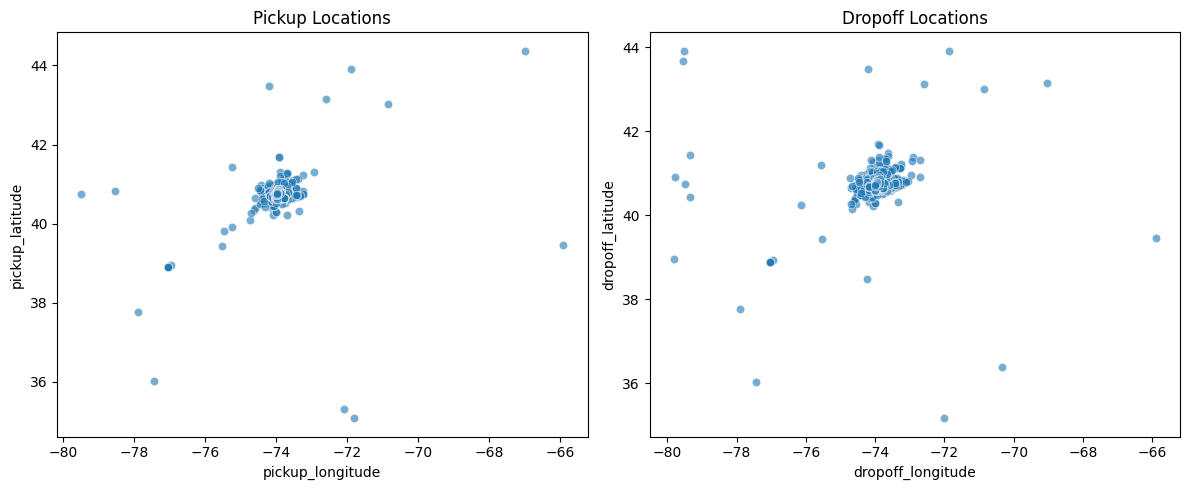

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# scatter plot 1
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=df, alpha=0.6, ax=ax1)
ax1.set_title('Pickup Locations')
ax1.set_xlabel('pickup_longitude')
ax1.set_ylabel('pickup_latitude')

# scatter plot 2
sns.scatterplot(x='dropoff_longitude', y='dropoff_latitude', data=df, alpha=0.6, ax=ax2)
ax2.set_title('Dropoff Locations')
ax2.set_xlabel('dropoff_longitude')
ax2.set_ylabel('dropoff_latitude')

plt.tight_layout()
plt.show()

In [11]:
df['passenger_count'].value_counts()

passenger_count
1    708627
2    143904
5     53635
3     41012
6     33287
4     19491
0        38
7         2
Name: count, dtype: int64

* **here are 38 data entry errors assigned with 0 & 2 were assigned with 7.**

# Dealing with outlier values

In [12]:
df = df[df['passenger_count'] > 0].copy()
df['passenger_count'] = df['passenger_count'].clip(upper=6)

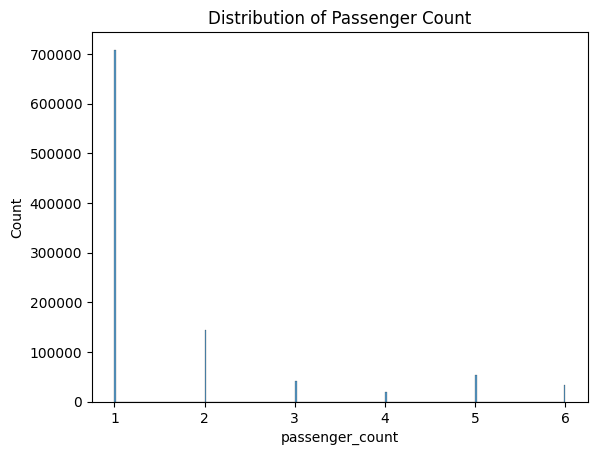

In [13]:
sns.histplot(df['passenger_count'],kde=False)
plt.title('Distribution of Passenger Count')
plt.show()


**Here we see that the frequency of trips by the number of passengers.**

**We can observe that most trips are taken by single passengers, indicating that solo rides dominate NYC taxi usage.**

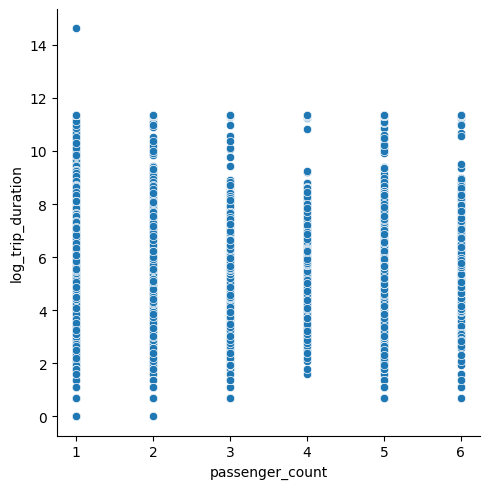

In [14]:
df['log_trip_duration'] = np.log(df['trip_duration'])
sns.relplot(x="passenger_count", y="log_trip_duration", data=df, kind="scatter")

**This scatter plot shows how trip duration changes with passenger count.**

**We can see no strong relationship, meaning that trip duration is mostly independent of the number of passengers.**

Text(0.5, 0, 'Trip Duration (seconds)')

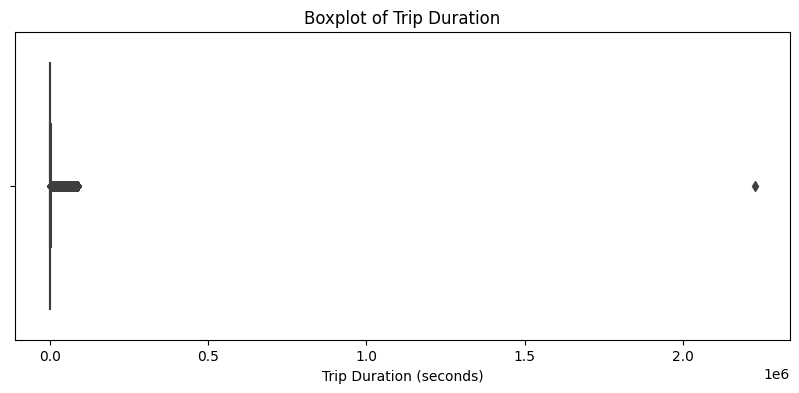

In [15]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['trip_duration'])
plt.title('Boxplot of Trip Duration')
plt.xlabel('Trip Duration (seconds)')



**The boxplot illustrates the spread and outliers in trip duration.**

**We can see a right-skewed distribution, meaning that most trips are short, but there are a few very long trips that extend the range.**

In [16]:
# Dealing with the trip duration outliers

lower = df['trip_duration'].quantile(0.05)
upper = df['trip_duration'].quantile(0.99)
df['trip_duration'] = df['trip_duration'].clip(lower, upper)
df['trip_duration'].describe()

count    999958.000000
mean        835.959691
std         625.582921
min         181.000000
25%         397.000000
50%         662.000000
75%        1074.000000
max        3434.430000
Name: trip_duration, dtype: float64

* **clipping the outlies and replace them with a normal values.**

In [17]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day']=df['pickup_datetime'].dt.day_name()

In [18]:
 df['day'].value_counts()

day
Friday       152826
Saturday     151445
Thursday     149936
Wednesday    144162
Tuesday      138792
Sunday       134312
Monday       128485
Name: count, dtype: int64

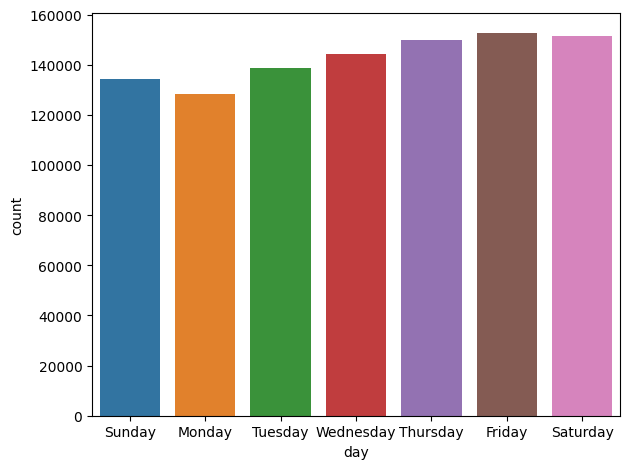

In [19]:
sns.countplot(x='day',data=df, order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.tight_layout()


**This chart shows the number of pickups for each day of the week.** 

**We can identify patterns such as higher demand on weekdays.**

In [20]:
def time_bucket(h):  # Business hour (8|9 am : 5|6 pm)
        if 4 <= h < 10:  
            return 'morning'
        elif 10 <= h < 16:  
            return 'midday'
        elif 16 <= h < 22:  
            return 'evening'
        elif h >= 22 or h < 4:
            return 'late night'

df['time_bucket'] = df['hour'].apply(time_bucket)
#df = pd.get_dummies(df, columns=['time_bucket'], drop_first=True)

In [21]:
counts = df['time_bucket'].value_counts()
counts

time_bucket
evening       335660
midday        290165
late night    199570
morning       174563
Name: count, dtype: int64

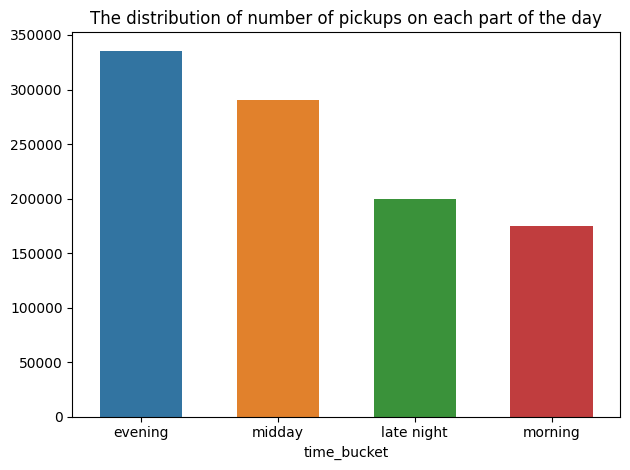

In [22]:
sns.barplot(x= counts.index, y= counts.values, width=.6)
plt.title('The distribution of number of pickups on each part of the day')
plt.tight_layout()

**This bar plot compares trip counts across different times of day — morning, midday, evening, and late night.**

**The evening period tends to have the highest number of pickups, likely due to after-work travel and nightlife activity.**

Text(0.5, 1.0, 'Distribution of pickup hours')

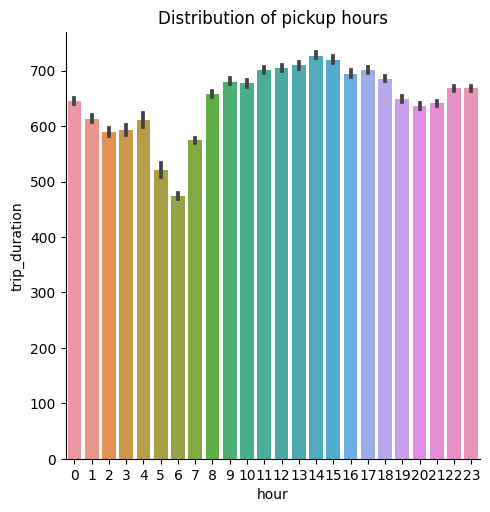

In [23]:
sns.catplot(x="hour", y="trip_duration",kind="bar",data=df, estimator='median')
plt.title('Distribution of pickup hours')

**This plot displays the average trip duration across each hour of the day.**

**It helps reveal when longer trips occur — typically, midday or late-night trips might be longer due to lower traffic but longer distances.**

# The relationship between vendor id and duration

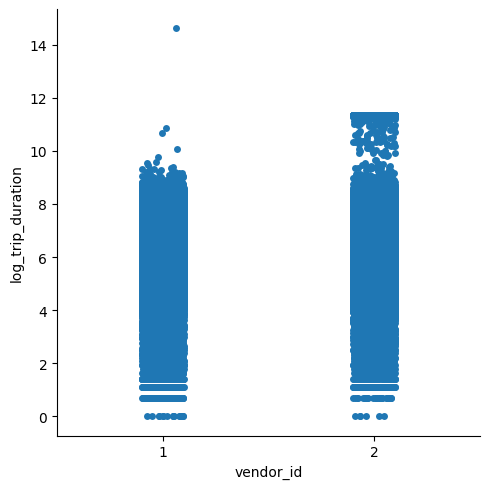

In [24]:
sns.catplot(x="vendor_id", y="log_trip_duration",kind="strip",data=df)


**This plot compares the two vendors and their average trip durations.**

**It helps check if one vendor tends to handle longer or shorter trips, though differences are usually minor.**

# The relationship between store forward flag and duration

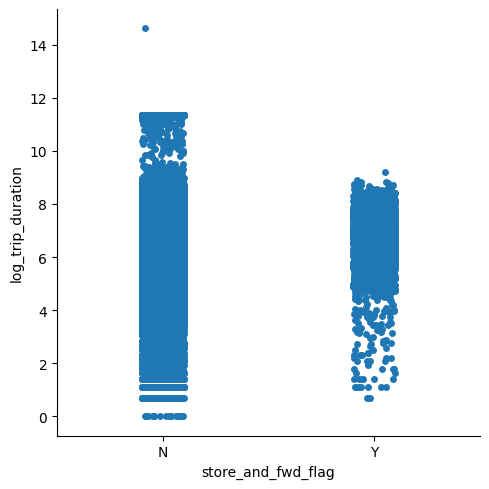

In [25]:
sns.catplot(x="store_and_fwd_flag", y="log_trip_duration",kind="strip",data=df)

**This shows whether trips stored in the taxi’s memory before being sent to the server differ in duration.**

**We usually expect no significant impact, confirming that the flag is more technical than behavioral.**


# The relationship between geographical location and duration

* Trip patterns across different times of day and trip durations — analyzing north–south (latitude) travel movements in NYC.

In [26]:
bins=np.array([0,1800,3600])
df['duration_time']=pd.cut(df.trip_duration,bins,labels=["< 30 min", "30:1 h "], include_lowest=True)

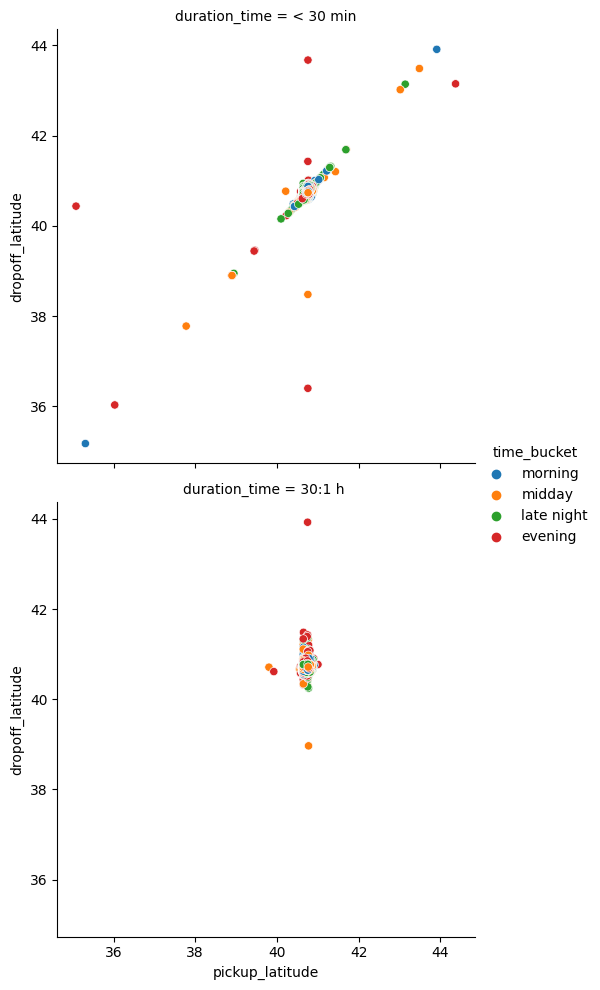

In [27]:
sns.relplot(x="pickup_latitude", y="dropoff_latitude",hue='time_bucket',row='duration_time',data=df)

**This multi-faceted plot shows how trip start and end points vary across durations and times of day.**

**It visually identifies spatial clusters — e.g., short trips might concentrate around city centers, while longer ones extend outward.**

In [28]:
lat1, long1, lat2, long2 = df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df[ 'dropoff_longitude'] 

# Haversine distance equation = 2R.arcsin√sin²(▽lat/2 ) + cos(lat1) * cos(lat2) * sin²(▽long/2) 

def Haversine_dist(lat1, long1, lat2, long2): 
    R = 6371 
    lat1, long1, lat2, long2 = map(np.radians, [lat1, long1, lat2, long2])
    dlat = lat2 - lat1 
    dlong = long2 - long1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong / 2) ** 2 
    return 2 * R * np.arcsin(np.sqrt(a)) 
    
df['Haversine_dist'] = Haversine_dist(lat1, long1, lat2, long2)

In [29]:
df['speed'] = df['Haversine_dist'] / (df['trip_duration'] / 3600)  # km/h
df['speed'] = df['speed'].clip(0, 60)

Text(0.5, 1.0, 'Comprehensive Correlation Heatmap')

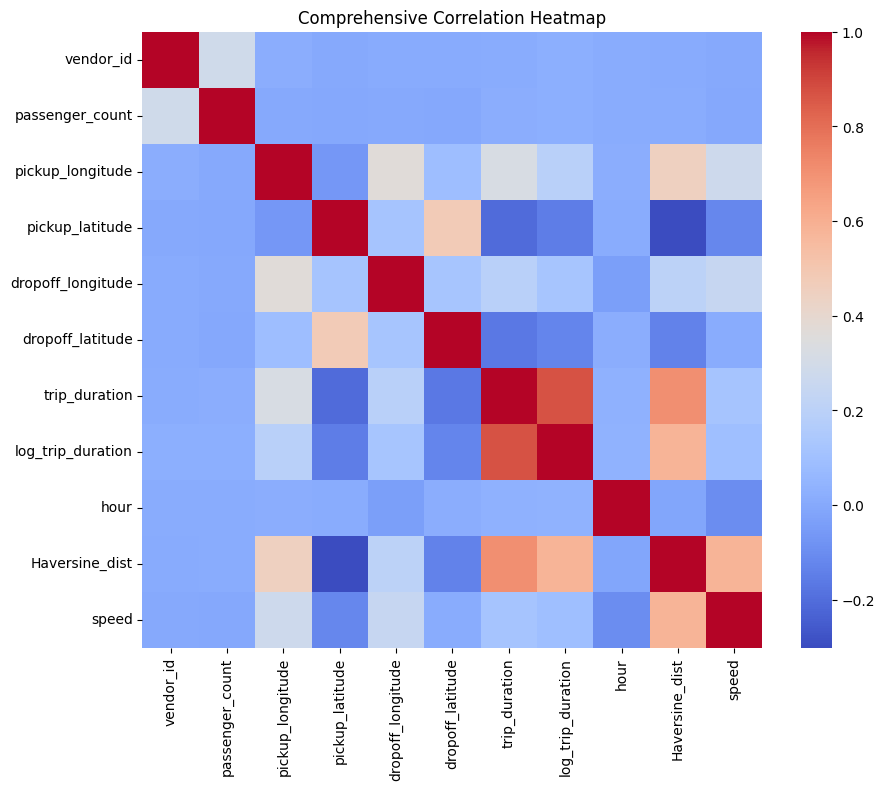

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Comprehensive Correlation Heatmap')

**The heatmap highlights relationships between numeric features.**

**For instance, trip duration correlates strongly with distance, but not much with passenger count — confirming what we saw in the scatter plots.**

# Conclusion

 * **Duration highly skewed → most trips are short, a few extreme long trips.**

* **Passenger Count mainly 1–2 → possible data entry issues for 0 or >6 passengers.**

* **Vendor Differences: Vendor 2 slightly faster on average but with more variability.**

* **Temporal Patterns:**

    * **Longer trips during rush hours (8–10 AM, 5–7 PM).**

    * **Shorter trips late at night.**

    * **Weekday Effect: Minor differences, but weekends show slightly longer average trips.**

* **Spatial Behavior:**

    * **Pickups & dropoffs concentrated in Manhattan.**

    * **A few outliers far from NYC area (data quality issue).**

    * **Store_and_fwd_flag has negligible impact on trip duration → likely technical/log-related.**

    * **Haversine Distance shows strong positive correlation with trip duration.**

    * **Speed feature useful for detecting unrealistic trips (too slow/too fast).**